In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
import time
%matplotlib inline

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [3]:
# Define some variables 
img_rows, img_cols = 28, 28            # input image dimensions
num_classes = 10                       # 10 classes
input_shape = (img_rows, img_cols, 1)  # shape = (height, width, channels)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)
print(y_test[0])

Training data shape:  (60000, 28, 28, 1)
Training labels shape:  (60000, 10)
Test data shape:  (10000, 28, 28, 1)
Test labels shape:  (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [4]:
batch_size = 128
epochs = 8

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# Save the model according to the conditions  
checkpoint = ModelCheckpoint('MNIST_ConvNet.h5', monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [checkpoint, early])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2637 - acc: 0.9191 - val_loss: 0.0533 - val_acc: 0.9835

Epoch 00001: val_acc improved from -inf to 0.98350, saving model to MNIST_ConvNet.h5
Epoch 2/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0887 - acc: 0.9739 - val_loss: 0.0396 - val_acc: 0.9870

Epoch 00002: val_acc improved from 0.98350 to 0.98700, saving model to MNIST_ConvNet.h5
Epoch 3/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0673 - acc: 0.9805 - val_loss: 0.0361 - val_acc: 0.9886

Epoch 00003: val_acc improved from 0.98700 to 0.98860, saving model to MNIST_ConvNet.h5
Epoch 4/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0561 - acc: 0.9832 - val_loss: 0.0332 - val_acc: 0.9886

Epoch 00004: val_acc did not improve from 0.98860
Epoch 5/12
60000/60000 [===============

In [7]:
#model.save('MNIST_ConvNet.h5')

In [8]:
model = load_model('MNIST_ConvNet.h5')

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026377914569733547
Test accuracy: 0.992


Image_label: 7
Predicted Label:  7


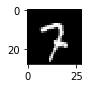

In [10]:
Test_image_number = 41

print("Image_label:", y_test[Test_image_number].argmax())
print("Predicted Label: ", model.predict(x_test[Test_image_number].reshape(1,28,28,1)).argmax())
plt.figure(figsize = (1,1))
plt.imshow(x_test[Test_image_number].reshape(28,28), cmap = 'gray')

Predicted Label:  9


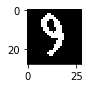

In [11]:
gimp_image = np.array(Image.open('gimp_image.png'))
plt.figure( figsize = (1,1))
plt.imshow(gimp_image, cmap = 'gray')
print("Predicted Label: ", model.predict(gimp_image.reshape(1,28,28,1)/255).argmax())